In [1]:
%matplotlib inline


# Plotting Validation Curves


In this plot you can see the training scores and validation scores of an SVM
for different values of the kernel parameter gamma. For very low values of
gamma, you can see that both the training score and the validation score are
low. This is called underfitting. Medium values of gamma will result in high
values for both scores, i.e. the classifier is performing fairly well. If gamma
is too high, the classifier will overfit, which means that the training score
is good but the validation score is poor.



In [7]:
def plot_validation_curve(clf, X, y, range_of_param, param_name, eval_metric):
    import matplotlib.pyplot as plt
    import numpy as np

    from sklearn.datasets import load_digits
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import validation_curve  

    param_range = np.linspace(range_of_param[0], range_of_param[1], range_of_param[2])
    train_scores, test_scores = validation_curve(
        clf, X, y, param_name=param_name, param_range=param_range,
        cv=5, scoring=eval_metric, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.title("Validation Curve with Decision Tree")
    plt.xlabel(r"$\max_depth$")
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()
    


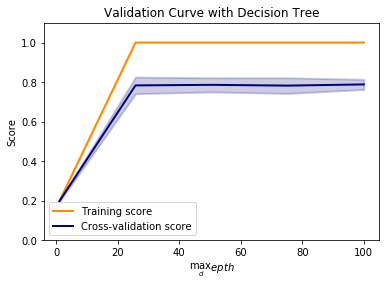

In [5]:
def plot_validation_curve(clf, X, y, param_range, param_name):

    import matplotlib.pyplot as plt
    import numpy as np

    from sklearn.datasets import load_digits
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import validation_curve

    digits = load_digits()
    X, y = digits.data, digits.target

    param_range = np.linspace(1, 100, 5)
    train_scores, test_scores = validation_curve(
        DecisionTreeClassifier(), X, y, param_name="max_depth", param_range=param_range,
        cv=5, scoring="accuracy", n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Validation Curve with Decision Tree")
    plt.xlabel(r"$\max_depth$")
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()